In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import datetime
import pandas as pd

from nowquotes import download
from wmDownloader import getOptionsInfo,getHistoryQuotesInfo

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
risk_free_rate = 0.03 #无风险利率 优化点1  0.005 利率差 对应期权0.1%价格波动，变化不大
dividend_rate =  0
day_count = ql.Actual365Fixed()  #一年的日期数 优化点2  

In [9]:
def calculateImpliedVolatility(option_price,spot_price,strike_price,calculation_date,maturity_date,option_type):
    volatility = 0
    calendar = ql.China() 
    payoff = ql.PlainVanillaPayoff(option_type, strike_price)  
    exercise = ql.EuropeanExercise(maturity_date) 
    european_option = ql.VanillaOption(payoff, exercise) 
    spot_handle = ql.QuoteHandle(  
        ql.SimpleQuote(spot_price)
    )
    flat_ts = ql.YieldTermStructureHandle( 
        ql.FlatForward(calculation_date, risk_free_rate, day_count)
    )  
    dividend_yield = ql.YieldTermStructureHandle(
        ql.FlatForward(calculation_date, dividend_rate, day_count)
    ) 
    flat_vol_ts = ql.BlackVolTermStructureHandle(
        ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)  
    )
    bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                               dividend_yield, 
                                               flat_ts, 
                                               flat_vol_ts)
    vol = european_option.impliedVolatility(option_price,bsm_process)
    
    flat_vol_ts2 = ql.BlackVolTermStructureHandle(
        ql.BlackConstantVol(calculation_date, calendar, vol, day_count)  
    )
    bsm_process2 = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts2)
    european_option2 = ql.VanillaOption(payoff, exercise) 
    european_option2.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process2))
    print european_option2.gamma()
#     print european_option2.NPV() - option_price
    return vol

In [4]:
downloader = download()
data = downloader.all
spot_price = downloader.targetPrice #标的价格 优化点3
# spot_price = 2.293
data[0]

,amount,buy_price,buy_volume,change_pct,high,high_limit,hold_volume,low,low_limit,name,now_price,open,prev_close,sell_price,sell_volume,status,strike_price,target,update_time,volume
10000615,3399317.12,0.2719,2,-5.19,0.2837,0.5155,1013,0.2653,0.0571,50ETF购12月2006A,0.2722,0.2837,0.2871,0.2722,4,A,2.006,510050,2016-12-23 15:00:00,1215
10000616,1805661.42,0.2188,10,-6.47,0.2330,0.4664,1241,0.2167,0.0080,50ETF购12月2055A,0.2228,0.2330,0.2382,0.2228,2,A,2.055,510050,2016-12-23 15:00:00,789
10000617,2076419.88,0.1742,1,-7.73,0.1853,0.4181,2355,0.1690,0.0001,50ETF购12月2104A,0.1743,0.1853,0.1889,0.1755,1,A,2.104,510050,2016-12-23 15:00:00,1152
10000618,3087973.00,0.1223,1,-10.80,0.1387,0.3700,3059,0.1203,0.0001,50ETF购12月2153A,0.1256,0.1358,0.1408,0.1258,5,A,2.153,510050,2016-12-23 15:00:00,2345
10000619,4681071.71,0.0761,1,-15.26,0.0906,0.3200,5978,0.0710,0.0001,50ETF购12月2202A,0.0772,0.0876,0.0911,0.0772,19,A,2.202,510050,2016-12-23 15:00:00,5732
10000625,3895356.07,0.321,1,-4.49,0.3323,0.5643,1401,0.3147,0.1059,50ETF购12月1957A,0.3210,0.3314,0.3361,0.3212,5,A,1.957,510050,2016-12-23 15:00:00,1177
10000629,5632495.46,0.3702,1,-4.25,0.3832,0.6132,4223,0.3635,0.1548,50ETF购12月1908A,0.3669,0.3796,0.3832,0.3712,10,A,1.908,510050,2016-12-23 14:56:46,1483
10000661,4191949.66,0.0318,11,-30.80,0.0453,0.2752,11157,0.0289,0.0001,50ETF购12月2250A,0.0319,0.0442,0.0461,0.0319,16,A,2.25,510050,2016-12-23 15:00:00,11336
10000669,741266.82,0.0057,24,-58.04,0.0140,0.2428,20327,0.0055,0.0001,50ETF购12月2299A,0.0060,0.0132,0.0143,0.006,525,A,2.299,510050,2016-12-23 15:00:00,9220
10000691,105622.68,0.0008,10,-61.54,0.0028,0.2262,27648,0.0006,0.0001,50ETF购12月2348A,0.0010,0.0028,0.0026,0.001,12,A,2.348,510050,2016-12-23 14:56:54,8045


In [5]:
options_info = getOptionsInfo(True)
options_info.head(3)

,contMultNum,contractStatus,contractType,currencyCD,deliDate,delistDate,exchangeCD,exerDate,expDate,expMonth,...,listDate,secID,secShortName,strikePrice,tickerSymbol,varExchangeCD,varSecID,varShortName,varTicker,varType
optID,,,,,,,,,,,,,,,,,,,,,
10000001,10000,DE,CO,CNY,2015-03-26,2015-03-25,XSHG,2015-03-25,2015-03-25,3,...,2015-02-09,510050C1503M02200.XSHG,50ETF购3月2200,2.20,510050C1503M02200,XSHG,510050.XSHG,华夏上证50ETF,510050,F
10000002,10000,DE,CO,CNY,2015-03-26,2015-03-25,XSHG,2015-03-25,2015-03-25,3,...,2015-02-09,510050C1503M02250.XSHG,50ETF购3月2250,2.25,510050C1503M02250,XSHG,510050.XSHG,华夏上证50ETF,510050,F
10000003,10000,DE,CO,CNY,2015-03-26,2015-03-25,XSHG,2015-03-25,2015-03-25,3,...,2015-02-09,510050C1503M02300.XSHG,50ETF购3月2300,2.30,510050C1503M02300,XSHG,510050.XSHG,华夏上证50ETF,510050,F


In [10]:
idx = 0
vol_dfs = []
for df in data:
    option_type = (ql.Option.Call if idx < 4 else ql.Option.Put)
    vol_df = pd.DataFrame(index=list(df["strike_price"]),columns=['bid','ask'])
    for index,row in df.iterrows():
        buy_price = row["buy_price"]
        sell_price = row["sell_price"]
        strike_price = row["strike_price"]
        exer_date = options_info["exerDate"][index]
        exer_datetime = datetime.datetime.strptime(exer_date,"%Y-%m-%d")
        maturity_date = ql.Date(exer_datetime.day, exer_datetime.month, exer_datetime.year) #交割日
        update_time = row["update_time"]
        update_datetime = datetime.datetime.strptime(update_time,"%Y-%m-%d %H:%M:%S")
        calculation_date = ql.Date(update_datetime.day, update_datetime.month, update_datetime.year) #交割日
        try:
            buy_vol = calculateImpliedVolatility(buy_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            sell_vol = calculateImpliedVolatility(sell_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            vol_df.set_value(strike_price,"bid",buy_vol)
            vol_df.set_value(strike_price,"ask",sell_vol)
#             print buy_vol,sell_vol
        except Exception,e:
            print buy_price,spot_price,strike_price
    vol_df = vol_df.sort_index()
    vol_dfs.append(vol_df)
    idx += 1

0.2719 2.279 2.006
0.2188 2.279 2.055
0.1742 2.279 2.104
0.1223 2.279 2.153
0.0761 2.279 2.202
0.321 2.279 1.957
0.3702 2.279 1.908
7.90529086263
7.92946949216
10.363364385
10.1790642753
2.49951689435
2.6966657254
0.874166249967
0.973298697302
0.526589091575
0.590589435205
0.243871506434
0.407287529234
9.96369527258
9.90687429685
2.40510379692
2.5068498223
0.842753697642
0.938858820761
0.508656657593
0.5705768187
0.297949499987
0.394046270471
0.173246044855
0.259526656847
7.58927323245
7.83649276829
0.0779 2.279 2.2
3.97836149761
3.9474255143
3.96328529884
3.95348975956
3.17876137354
3.16720902465
2.26945845098
2.26605702743
1.51251617826
1.5274802354
0.98489370483
0.992695950504
4.11820923819
4.10763862615
3.15021679679
3.1446214187
2.21840858397
2.21812769151
1.4550521795
1.45953801421
0.923762584429
0.940989689418
0.672221633083
0.680909744598
4.09097513952
4.08048853452
2.40323675065
2.42573672058
0.2218 2.279 2.055
0.1812 2.279 2.104
1.41965692883
1.5215976031
2.13304894643
2.0960

In [7]:
vol_dfs[0].tail(5)

,bid,ask
2.446,0.276161,0.285145
2.450,0.28164,0.290734
2.495,0.313443,0.352357
2.500,0.335632,0.359037
2.550,0.379203,0.41208


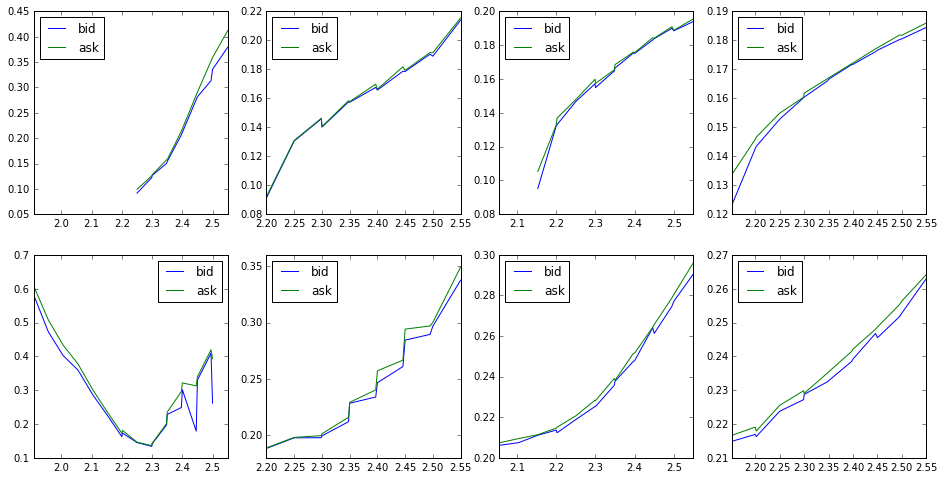

In [8]:
f, axarr = plt.subplots(2, 4,figsize=(16,8))
for i in range(0,8):
    vol_df = vol_dfs[i]
    ax = axarr[i / 4,i % 4]
#     ax.plot(vol_df["bid"])
    vol_df.plot(ax = ax)

In [19]:
def get_vol(df,option_type,spot_price):
    vol_df = pd.DataFrame(index=list(df["strike_price"]),columns=['bid','ask'])
    for index,row in df.iterrows():
        buy_price = row["buy_price"]
        sell_price = row["sell_price"]
        strike_price = row["strike_price"]
        exer_date = options_info["exerDate"][index]
        exer_datetime = datetime.datetime.strptime(exer_date,"%Y-%m-%d")
        maturity_date = ql.Date(exer_datetime.day, exer_datetime.month, exer_datetime.year) #交割日
        update_time = row["update_time"]
        update_datetime = datetime.datetime.strptime(update_time,"%Y-%m-%d %H:%M:%S")
        calculation_date = ql.Date(update_datetime.day, update_datetime.month, update_datetime.year) #交割日
        try:
            buy_vol = calculateImpliedVolatility(buy_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            sell_vol = calculateImpliedVolatility(sell_price,spot_price,strike_price,calculation_date,maturity_date,option_type)
            vol_df.set_value(strike_price,"bid",buy_vol)
            vol_df.set_value(strike_price,"ask",sell_vol)
#             print buy_vol,sell_vol
        except Exception,e:
            continue
#             print buy_price,spot_price,strike_price
    vol_df = vol_df.sort_index()
    return vol_df

In [20]:
delta_se = pd.Series()
vol_se = pd.Series()
for i in range(-20,20):
    fix_spot_price = spot_price + float(i)/1000
    call_df = data[0]
    put_df = data[4]
    call_df = call_df.drop_duplicates(subset="strike_price")
    put_df = put_df.drop_duplicates(subset="strike_price")
    call_vol_df = get_vol(call_df,ql.Option.Call,fix_spot_price)
    put_vol_df = get_vol(put_df,ql.Option.Put,fix_spot_price)
    delta = (call_vol_df["ask"] - put_vol_df["ask"]).abs().dropna()
    delta_se[fix_spot_price] = delta.min()
    vol_se[fix_spot_price] = call_vol_df["ask"][delta.idxmin()]

In [21]:
vol_se = vol_se.astype(float)

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


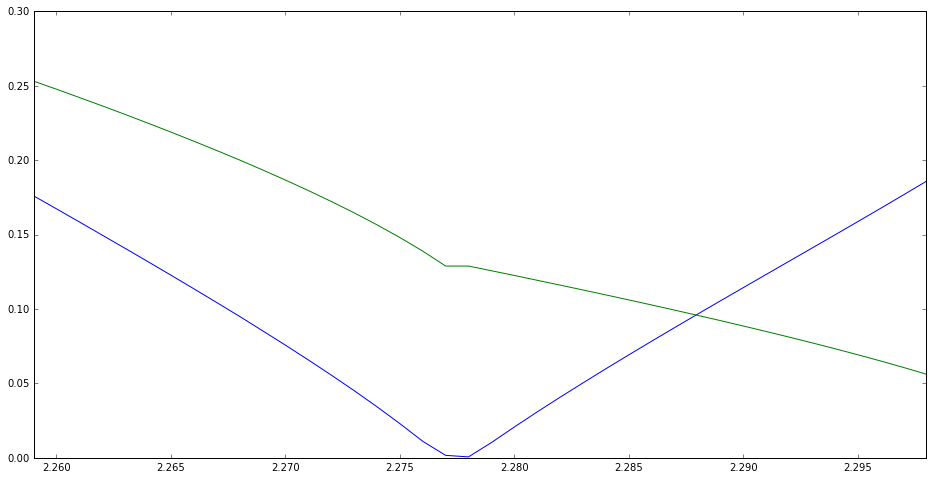

In [22]:
print delta_se.plot(figsize=(16,8))
print vol_se.plot(figsize=(16,8))

In [12]:
vol_se.head(3)

2.259    0.253152
2.260    0.247719
2.261    0.242143
dtype: float64